# Regresión lineal múltiple

Cargar los datos del archivo `data_multiple_regression_exercice.csv` que corresponden a datos de medidas de circunferencias corporales y pesos:

Se desea estudiar como depende la variable **weight** en función de las otras variables. 

In [140]:
import pandas as pd

df = pd.read_csv("data_multiple_regression_exercice.csv")

df.describe()

,weight,biacromial,pelvic.breadth,bitrochanteric,chest.depth,chest.diam,elbow.diam,wrist.diam,knee.diam,ankle.diam,...,hip.girth,thigh.girth,bicep.girth,forearm.girth,knee.girth,calf.girth,ankle.girth,wrist.girth,age,height
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,...,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,69.147535,38.811440,27.829980,31.980473,19.226036,27.973767,13.385207,10.542604,18.810651,13.863314,...,96.680868,56.855819,31.169625,25.942998,36.202959,36.078304,22.157396,16.097436,30.157396,171.143787
std,13.345762,3.059132,2.206308,2.030916,2.515877,2.741650,1.352906,0.944361,1.347595,1.247351,...,6.680623,4.459889,4.246941,2.830579,2.617570,2.847661,1.862337,1.380931,9.622772,9.407205
min,42.000000,32.400000,18.700000,24.700000,14.300000,22.200000,9.900000,8.100000,15.700000,9.900000,...,78.800000,46.300000,22.400000,19.600000,29.000000,28.400000,16.400000,13.000000,18.000000,147.200000
25%,58.400000,36.200000,26.500000,30.600000,17.300000,25.650000,12.400000,9.800000,17.900000,13.000000,...,92.000000,53.700000,27.600000,23.600000,34.400000,34.100000,21.000000,15.000000,23.000000,163.800000
50%,68.200000,38.700000,28.000000,32.000000,19.000000,27.800000,13.300000,10.500000,18.700000,13.800000,...,96.000000,56.300000,31.000000,25.800000,36.000000,36.000000,22.000000,16.100000,27.000000,170.300000
75%,78.850000,41.150000,29.250000,33.350000,20.900000,29.950000,14.400000,11.200000,19.600000,14.800000,...,101.000000,59.500000,34.450000,28.400000,37.950000,38.000000,23.300000,17.100000,36.000000,177.800000
max,116.400000,47.400000,34.700000,38.000000,27.500000,35.600000,16.700000,13.300000,24.300000,17.200000,...,128.300000,75.700000,42.400000,32.500000,49.000000,47.700000,29.300000,19.600000,67.000000,198.100000


## Ejercicio 1

Separar el conjunto de registros en dos conjuntos de datos, uno para construir el modelo y otro para realizar las predicciones y evaluar los resultados.

In [141]:
from sklearn.model_selection import train_test_split

# Separo la variable objetivo de las explicadas
X, y = df.drop(['weight'], axis=1), df['weight']

# Divido el conjunto en prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Gráfico de densidad de los conjuntos

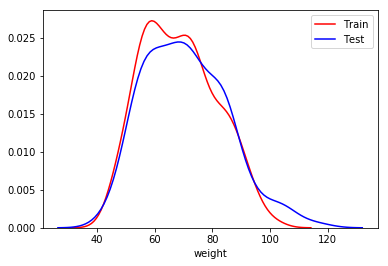

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(y_train, color='red', label='Train', hist=False)
sns.distplot(y_test, color='blue', label='Test', hist=False)
plt.show()

## Box plot de los conjuntos

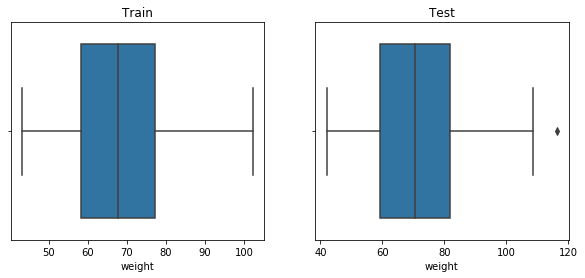

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Train')
sns.boxplot(y_train)

plt.subplot(1,2,2)
plt.title('Test')
sns.boxplot(y_test)

plt.show()

## Ejercicio 2

Realizar el modelo de regresión multiple con todas las variables involucradas y la validación del modelo.

In [144]:
from sklearn import linear_model

# Creo el modelo
lm = linear_model.LinearRegression()
# Ajusto los datos de entrenamiento
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Valor de $R^2$

In [145]:
# El método score devuelve el valor de R^2
lm.score(X_test, y_test)

0.9658671887898211

## Ejericio 3

Realizar otro modelo de regresión lineal múltiple, eliminando variables con algún criterio.

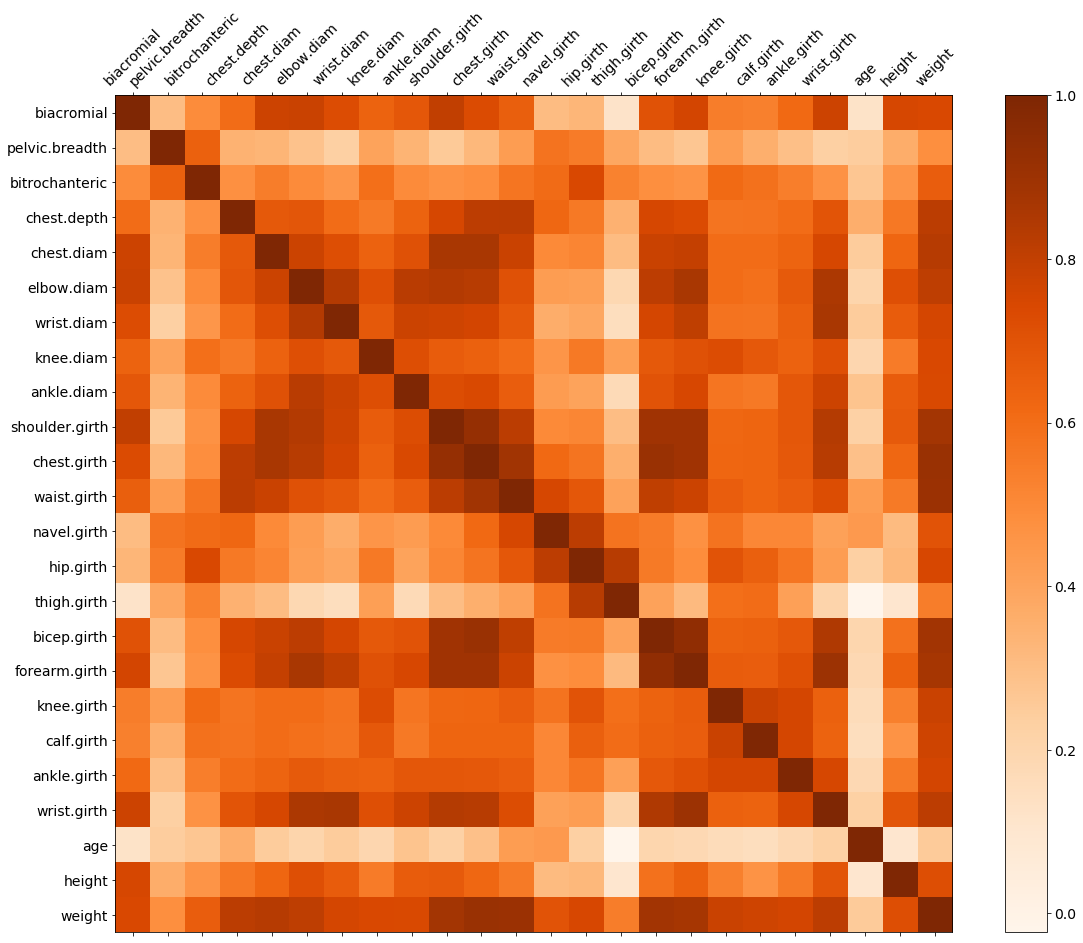

In [146]:
import matplotlib.pyplot as plt
import numpy as np

df_train = pd.concat([X_train, y_train], axis=1)

f = plt.figure(figsize=(19, 15))
plt.matshow(df_train.corr(), fignum=f.number, cmap='Oranges')
plt.xticks(range(df_train.shape[1]), df_train.columns, fontsize=14, rotation=45)
plt.yticks(range(df_train.shape[1]), df_train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [190]:
from sklearn import linear_model

dropped_xs = ['pelvic.breadth']

X_train2 = X_train.drop(dropped_xs, axis=1)
X_test2 = X_test.drop(dropped_xs, axis=1)

# Creo el modelo
lm = linear_model.LinearRegression()
# Ajusto los datos de entrenamiento
lm.fit(X_train2,y_train)

lm.score(X_test2, y_test)

#plt.plot(lm.coef_, '-o')

0.9659458418291192